In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Step 1: Load preprocessed data
X_train = pd.read_csv("../Data/preprocessed/X_train.csv")
X_test = pd.read_csv("../Data/preprocessed/X_test.csv")
y_train = pd.read_csv("../Data/preprocessed/y_train.csv").squeeze()
y_test = pd.read_csv("../Data/preprocessed/y_test.csv").squeeze()

In [12]:
# Step 2: Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

In [13]:
# Step 3: Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision (0)": report["0"]["precision"],
        "Recall (0)": report["0"]["recall"],
        "F1-Score (0)": report["0"]["f1-score"],
        "Precision (1)": report["1"]["precision"],
        "Recall (1)": report["1"]["recall"],
        "F1-Score (1)": report["1"]["f1-score"]
    })
    
    print(f"\n📊 {name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


📊 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.32      0.44       300
           1       0.56      0.87      0.68       300

    accuracy                           0.59       600
   macro avg       0.64      0.59      0.56       600
weighted avg       0.64      0.59      0.56       600


📊 SVM Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.19      0.31       300
           1       0.54      0.93      0.68       300

    accuracy                           0.56       600
   macro avg       0.64      0.56      0.49       600
weighted avg       0.64      0.56      0.49       600


📊 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.61      0.64       300
           1       0.64      0.69      0.66       300

    accuracy                           0.65       600
   macro 

In [14]:
# Step 4: Show results as a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("\n✅ Model Comparison Table:")
display(results_df)


✅ Model Comparison Table:


,Model,Accuracy,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1)
2,Random Forest,0.651667,0.664260,0.613333,0.637782,0.640867,0.690000,0.664526
4,Gradient Boost,0.610000,0.609272,0.613333,0.611296,0.610738,0.606667,0.608696
0,Logistic Regression,0.595000,0.711111,0.320000,0.441379,0.561290,0.870000,0.682353
3,AdaBoost,0.588333,0.578171,0.653333,0.613459,0.601533,0.523333,0.559715
1,SVM,0.563333,0.743590,0.193333,0.306878,0.536398,0.933333,0.681265


In [15]:
# Step 5: Best model name
best_model_name = results_df.iloc[0]["Model"]
print(f"\n🏆 Best Model Based on Accuracy: {best_model_name}")


🏆 Best Model Based on Accuracy: Random Forest



🔎 Confusion Matrix for Random Forest:


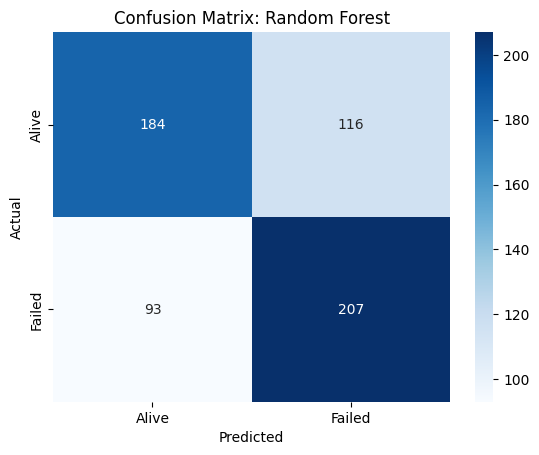

In [16]:
# Optional Step 6: Confusion matrix for best model
print(f"\n🔎 Confusion Matrix for {best_model_name}:")
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Alive", "Failed"], yticklabels=["Alive", "Failed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()